<a href="https://colab.research.google.com/github/kjyothiswaroop/SHALA2020/blob/master/Copy_of_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [1]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
movies = pd.read_csv(r"https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv")

In [0]:
df=pd.read_csv(r"https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv")

In [4]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [5]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [6]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [7]:
# Check for missing values 

df.isnull()

# Drop the missing values 
# No Missing values found

# Print the size of df after dropping 
print(df.shape)
print(df.size)

(1028, 34)
34952


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 

df['MonthRateNew']= (df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std()


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [9]:
movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   title             600 non-null    object 
 2   title_type        600 non-null    object 
 3   genre             600 non-null    object 
 4   runtime           599 non-null    float64
 5   mpaa_rating       600 non-null    object 
 6   studio            595 non-null    object 
 7   thtr_rel_year     600 non-null    int64  
 8   thtr_rel_month    600 non-null    int64  
 9   thtr_rel_day      600 non-null    int64  
 10  dvd_rel_year      593 non-null    float64
 11  dvd_rel_month     593 non-null    float64
 12  dvd_rel_day       593 non-null    float64
 13  imdb_rating       600 non-null    float64
 14  imdb_num_votes    600 non-null    int64  
 15  critics_rating    600 non-null    object 
 16  critics_score     600 non-null    int64  
 1

In [10]:

# Check for missing values 
pd.set_option('display.max_rows',None)
movies.info() #From the info we see that we indeed have missing values
movies.isnull().sum()
len(movies.count(axis=1).loc[(movies.count(axis=1))<31]) # The number of Rows which have missing columns
# Drop the missing values
movies_new=movies.dropna()
# Replace the missing values
from sklearn.impute import SimpleImputer
movies1=movies[['runtime','dvd_rel_year','dvd_rel_month','dvd_rel_day']]
movies2=movies[['studio','director','actor1','actor2','actor3','actor4','actor5']]
impute=SimpleImputer(missing_values=np.nan,strategy='mean')
imputed=impute.fit(movies1)
movies1=pd.DataFrame(imputed.transform(movies1))
impute1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputed1=impute1.fit(movies2)
movies2=pd.DataFrame(imputed1.transform(movies2))



# You can use SimpleImputer of sklearn for this



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   title             600 non-null    object 
 2   title_type        600 non-null    object 
 3   genre             600 non-null    object 
 4   runtime           599 non-null    float64
 5   mpaa_rating       600 non-null    object 
 6   studio            595 non-null    object 
 7   thtr_rel_year     600 non-null    int64  
 8   thtr_rel_month    600 non-null    int64  
 9   thtr_rel_day      600 non-null    int64  
 10  dvd_rel_year      593 non-null    float64
 11  dvd_rel_month     593 non-null    float64
 12  dvd_rel_day       593 non-null    float64
 13  imdb_rating       600 non-null    float64
 14  imdb_num_votes    600 non-null    int64  
 15  critics_rating    600 non-null    object 
 16  critics_score     600 non-null    int64  
 1

In [11]:
movies1.rename(columns={0:'runtime',1:'dvd_rel_year',2:'dvd_rel_month',3:'dvd_rel_day'},inplace=True)
movies1

,runtime,dvd_rel_year,dvd_rel_month,dvd_rel_day
0,80.000000,2013.000000,7.000000,30.000000
1,101.000000,2001.000000,8.000000,28.000000
2,84.000000,2001.000000,8.000000,21.000000
3,139.000000,2001.000000,11.000000,6.000000
4,90.000000,2005.000000,4.000000,19.000000
5,78.000000,2010.000000,4.000000,20.000000
6,142.000000,2003.000000,2.000000,18.000000
7,93.000000,2004.000000,3.000000,2.000000
8,88.000000,2013.000000,1.000000,21.000000
9,119.000000,2012.000000,8.000000,14.000000


In [12]:
movies2.rename(columns={0:'studio',1:'director',2:'actor1',3:'actor2',4:'actor3',5:'actor4',6:'actor5'},inplace=True)
movies.drop(['dvd_rel_year','dvd_rel_month','dvd_rel_day','studio','director','actor1','actor2','actor3','actor4','actor5'],inplace=True,axis=1)
movies=pd.concat([movies,movies1,movies2],axis=1)
movies.info()# finally we have no more missing values in the data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   title             600 non-null    object 
 2   title_type        600 non-null    object 
 3   genre             600 non-null    object 
 4   runtime           599 non-null    float64
 5   mpaa_rating       600 non-null    object 
 6   thtr_rel_year     600 non-null    int64  
 7   thtr_rel_month    600 non-null    int64  
 8   thtr_rel_day      600 non-null    int64  
 9   imdb_rating       600 non-null    float64
 10  imdb_num_votes    600 non-null    int64  
 11  critics_rating    600 non-null    object 
 12  critics_score     600 non-null    int64  
 13  audience_rating   600 non-null    object 
 14  audience_score    600 non-null    int64  
 15  best_pic_nom      600 non-null    object 
 16  best_pic_win      600 non-null    object 
 1

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

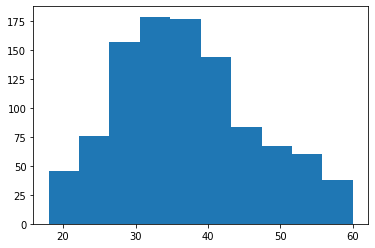

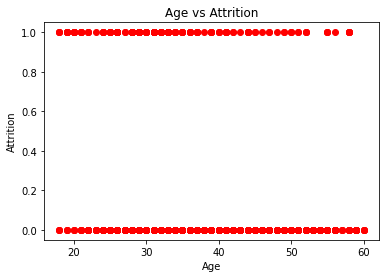

In [13]:
# Plot and modify the histogram of Age
plt.hist(df.Age)
plt.show()

# Draw a scatter plot between Age and Attrition
plt.scatter(x=df.Age,y=df.Attrition,c='red')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.title('Age vs Attrition')
plt.show()


In [14]:
z=pd.crosstab(df.Age>50,df.Attrition)
req=z.iloc[1,1]
total=z.iloc[:,1].sum()
(req/total)*100 #It is very less likely that people above 50 are getting attrited.

8.13953488372093

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


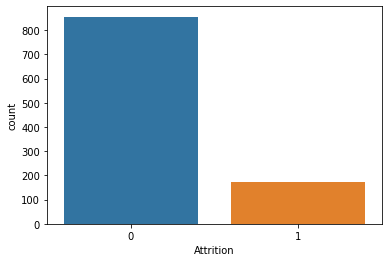

In [15]:
# Get a series of counts of values of Attrition
 print(df.Attrition.value_counts())
# Draw a countplot for Attrition
sns.countplot(df.Attrition) 
# You may use countplot of seaborn for this 



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                       92                150            614
1                       10                 47            115


'Travel_Rarely'

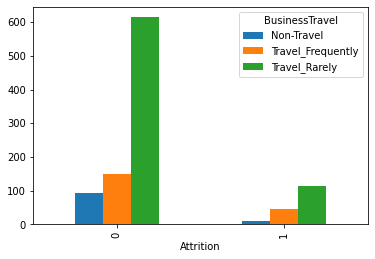

In [16]:
# Draw a cross tab of Attritiona and BusinessTravel
pd.crosstab(df.Attrition,df.BusinessTravel).plot(kind='bar') 
# You may use crosstab of pandas for this 
print(pd.crosstab(df.Attrition,df.BusinessTravel))
df.BusinessTravel.max()



### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

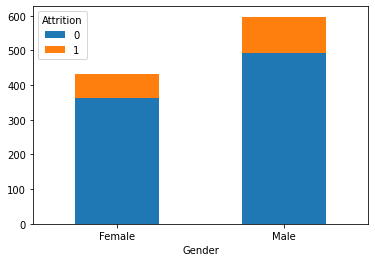

In [31]:
# Draw a stacked bar chart between Attrition and Gender 
df.groupby(['Gender', 'Attrition']).size().unstack().plot(kind='bar',stacked=True,rot=0)


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

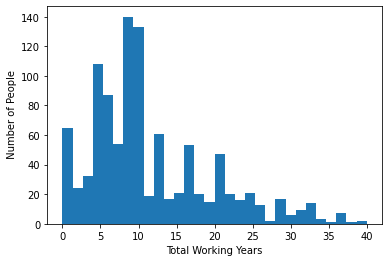

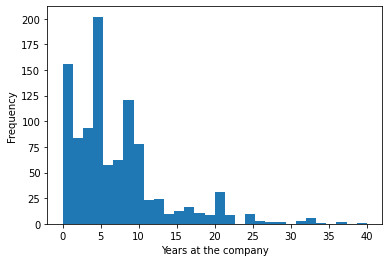

This shows us that the plot is left Skewed
The amount of skewness =  1.7724925350968725


In [17]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears,bins=30)
plt.xlabel("Total Working Years")
plt.ylabel(" Number of People")
plt.show()
# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany,bins=30)
plt.xlabel("Years at the company")
plt.ylabel("Frequency")
plt.show()
print('This shows us that the plot is left Skewed') 
a=df.YearsAtCompany.skew()
print("The amount of skewness = ",a)


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


As Seen in the plot we do have outliers in the R&d department and the sales department


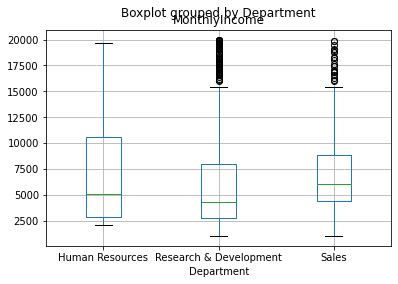

In [18]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
df.boxplot('MonthlyIncome','Department')
print("As Seen in the plot we do have outliers in the R&d department and the sales department")


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

In [19]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole
b=df.JobRole.value_counts()
print(b)


Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


([<matplotlib.patches.Wedge at 0x7f6264bf7198>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Research Director'),
  Text(1.03505987357499, -0.37235877606808926, 'Sales Representative'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

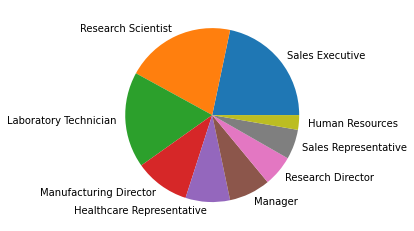

In [20]:
plt.pie(b,labels=b.index.to_list())